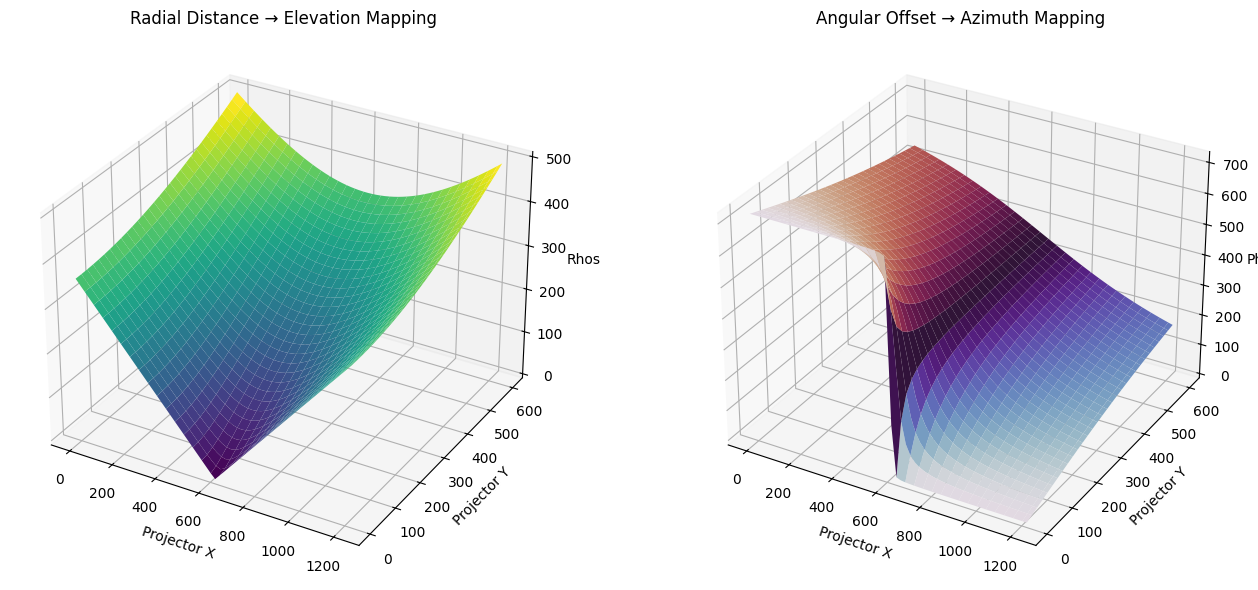

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from bowl import *
from bowl_stimulate_class import *
# Setup projector and stimulus space
xdim, ydim = 1240, 620
stim_x, stim_y = 720, 360
xcenter = xdim // 2
positiony = 0

# Create coordinate grids
x_vec = np.linspace(1, xdim, xdim)
y_vec = np.linspace(1, ydim, ydim)
xmat, ymat = np.meshgrid(x_vec, y_vec)

# Compute spherical mapping
rhos = (np.sqrt((xmat - xcenter)**2 + (ymat - positiony)**2)) / xcenter * stim_y
phis = (np.arctan2((ymat - positiony), (xmat - xcenter))) / np.pi * stim_x

# Downsample for plotting
step = 20
x_sample = xmat[::step, ::step]
y_sample = ymat[::step, ::step]
rho_sample = rhos[::step, ::step]
phi_sample = phis[::step, ::step]

# 3D plot for radial distance (elevation mapping)
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_sample, y_sample, rho_sample, cmap='viridis', edgecolor='none')
ax1.set_title('Radial Distance → Elevation Mapping')
ax1.set_xlabel('Projector X')
ax1.set_ylabel('Projector Y')
ax1.set_zlabel('Rhos')

# 3D plot for angular offset (azimuth mapping)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_sample, y_sample, phi_sample, cmap='twilight', edgecolor='none')
ax2.set_title('Angular Offset → Azimuth Mapping')
ax2.set_xlabel('Projector X')
ax2.set_ylabel('Projector Y')
ax2.set_zlabel('Phis')

plt.tight_layout()
plt.show()
